# Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Titanic dataset

In [7]:
data = pd.read_csv('train.csv')

# Inspect the data

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 1: Data Preprocessing

In [15]:
# Drop unnecessary columns: 'PassengerId', 'Name', 'Ticket', 'Cabin'
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values in 'Age' with the median age and in 'Embarked' with the mode

In [18]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' into numerical values using Label Encoding

In [21]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Male: 1, Female: 0
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])  # Convert C/Q/S to numerical

# Handle missing values in 'Fare' by filling them with the median

In [24]:
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Separate the features (X) and the target (y)

In [27]:
X = data.drop(columns='Survived')
y = data['Survived']

# Split the data into training and test sets (80% train, 20% test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Standardize the data using StandardScaler

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 2: Build the Artificial Neural Network (ANN) model

In [36]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(units=8, activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\sataa\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model

In [41]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6554 - loss: 0.7222 - val_accuracy: 0.7542 - val_loss: 0.6282
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.6520 - val_accuracy: 0.7877 - val_loss: 0.5808
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7232 - loss: 0.6127 - val_accuracy: 0.7765 - val_loss: 0.5454
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7806 - loss: 0.5500 - val_accuracy: 0.7821 - val_loss: 0.5205
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - loss: 0.5059 - val_accuracy: 0.7877 - val_loss: 0.5030
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7991 - loss: 0.4899 - val_accuracy: 0.7877 - val_loss: 0.4897
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 0.4711 - val_accuracy: 0.7933 - val_loss: 0.4801
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8006 - loss: 0.4550 - val_accuracy: 0.7933 - val_loss

# Step 4: Evaluate the model on the test set

In [44]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


# Step 5: Display results

In [47]:
print("\nAccuracy Score on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score on Test Set:  0.776536312849162

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       106
           1       0.82      0.58      0.68        73

    accuracy                           0.78       179
   macro avg       0.79      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179


Confusion Matrix:
 [[97  9]
 [31 42]]


# Plot the training loss and accuracy

In [50]:
import matplotlib.pyplot as plt

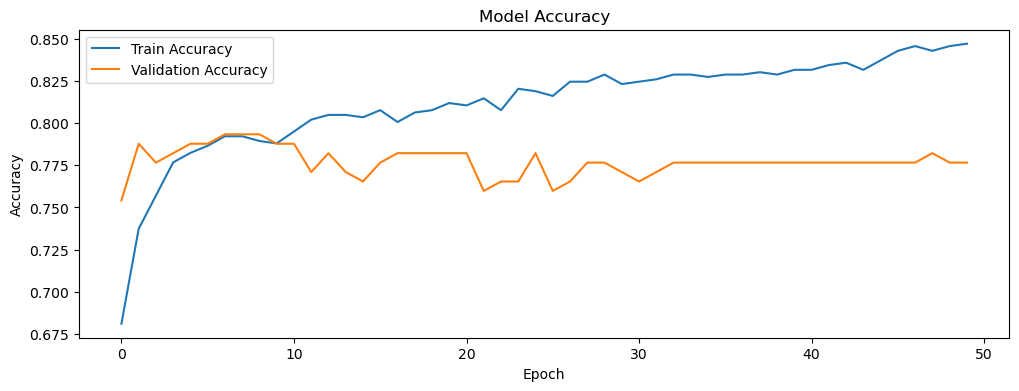

In [67]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('Accuracy.png')
plt.show()


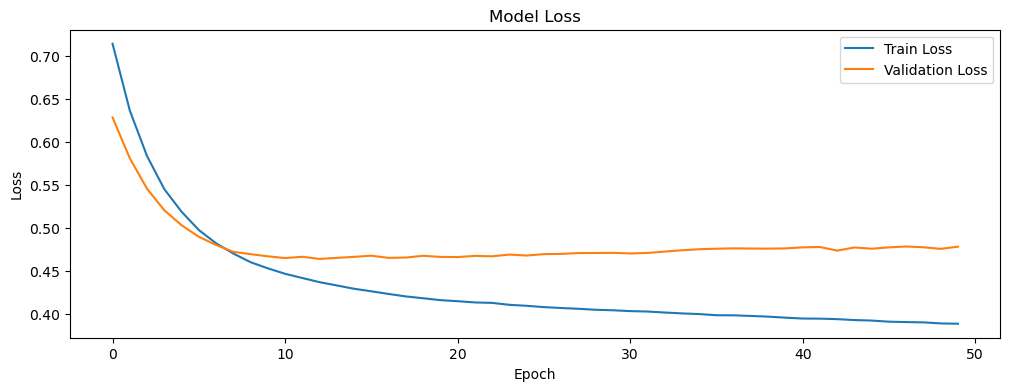

In [69]:
# Plot training & validation loss
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('Validation.png')
plt.show()
